In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from math  import sqrt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf').get_name()
rc('font', family= font_name)


In [2]:
ratings= {
    'user1':{'captin marvel':5, 'last mission':4, 'money':2},
    'user2':{'captin marvel':4, 'last mission':2, 'money':1},
    'me':{'last mission':4, 'money':3},
    'user3':{'captin marvel':3.5, 'last mission':4, 'money':4},


    
}

In [3]:
ratings['me']

{'last mission': 4, 'money': 3}

In [4]:
ratings['me']['money']

3

In [5]:
def similarity(i,j):
    return sqrt(pow(i,2)+pow(j,2))

In [6]:
var1 = ratings['me']['last mission'] -ratings['user3']['last mission']
var2 = ratings['me']['money'] -ratings['user3']['money']


similarity(var1,var2)

1.0

In [7]:
for i in ratings:
    if i != 'me': #자기자신 제외
        num1 = ratings['me']['last mission'] -ratings[i]['last mission']
        num2 = ratings['me']['money'] -ratings[i]['money']
        print(i, ":",similarity(num1,num2)) #거리가 멀수록 큰값

user1 : 1.0
user2 : 2.8284271247461903
user3 : 1.0


In [8]:
#정규화 (0-1) 0: 거리가 먼 데이터(관련도 낮음) , 1: 거리가 가까운 데이터 (관련도 높음)
for i in ratings:
    if i != 'me': #자기자신 제외
        num1 = ratings['me']['last mission'] -ratings[i]['last mission']
        num2 = ratings['me']['money'] -ratings[i]['money']
        print(i, ":",1/(1+ similarity(num1,num2))) #거리가 멀수록 큰값

user1 : 0.5
user2 : 0.2612038749637414
user3 : 0.5


In [9]:
# 다차원의 유사도 구하기
def similarity_distance(data, name1, name2):
    sum = 0
    for i in data[name1]:
        if i in data[name2]: #같은 영화를 봤다면
            # 각 축을 기준으로 차이를 구한다음 제곱을 하고, 총합의 제곱근이 거리 점수
            sum += pow(data[name1][i] - data[name2][i], 2)
    # 유사할수록 더 높은 값을 가지는 계산식 사용, 결과 값이 0과 1사이의 값을 반환
    #반환값이 1에 가까울수록 유사도가 높다
    return 1/ (1+ sqrt(sum))

In [10]:
print(similarity_distance(ratings, 'user1', 'user2'))
print(similarity_distance(ratings, 'user1', 'user3'))

0.28989794855663564
0.2857142857142857


In [15]:
# 전체 데이터에서 유사도가 가장 가까운 사람 구하기
def nearest_user(data, name, index= 3):
    nearest_user_list=[]
    
    for u in data:
        if name != u: # 자기자신은 제외
                nearest_user_list.append((similarity_distance(data, name, u), u))
    nearest_user_list.sort() # 오름차순
    nearest_user_list.reverse() # 내림차순

    return  nearest_user_list[:index]



In [16]:
nearest_user(ratings, 'user2')

[(0.28989794855663564, 'user1'),
 (0.2612038749637414, 'me'),
 (0.21551468935838852, 'user3')]

In [17]:
#평점과 이름 분리
def nearest_user(data, name, index= 3):
    score=[]
    names=[]

    for u in data:
        if name != u: # 자기자신은 제외
                score.append(similarity_distance(data, name, u))
                names.append(u)


    score.sort() # 오름차순
    names.sort() # 오름차순


    score.reverse() # 내림차순
    names.reverse() # 내림차순



    return  score, names

In [18]:
score, names= nearest_user(ratings, 'user2')
print(score)
print(names)

[0.28989794855663564, 0.2612038749637414, 0.21551468935838852]
['user3', 'user1', 'me']


In [19]:
#시각화
def draw_chart(data, labels):
    positions= range(len(data))
    plt.barh(positions, data, height= 0.5, color='b')
    plt.yticks(positions, labels)
    plt.xlabel('similarity')
    plt.ylabel('name')
    plt.show()

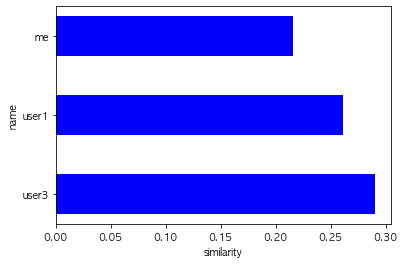

In [22]:
draw_chart(score,names)